In [1]:
import tfsites as tf

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
import numpy as np
import pandas as pd

import _fxns as fxn

import warnings
warnings.filterwarnings('ignore')

############################################################################
ETS pbm


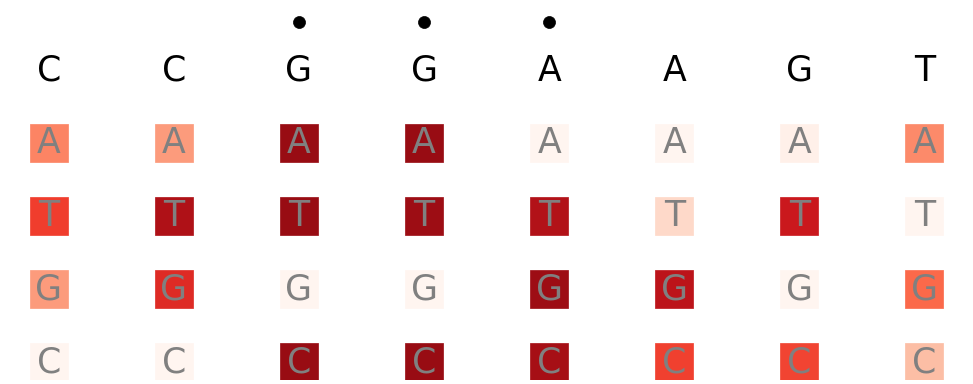

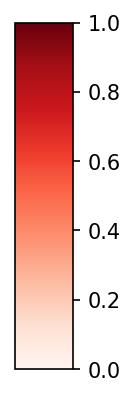

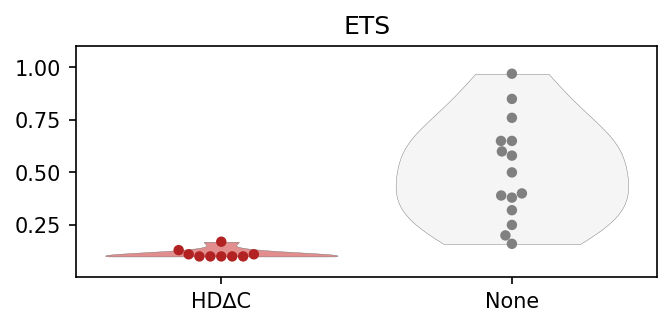

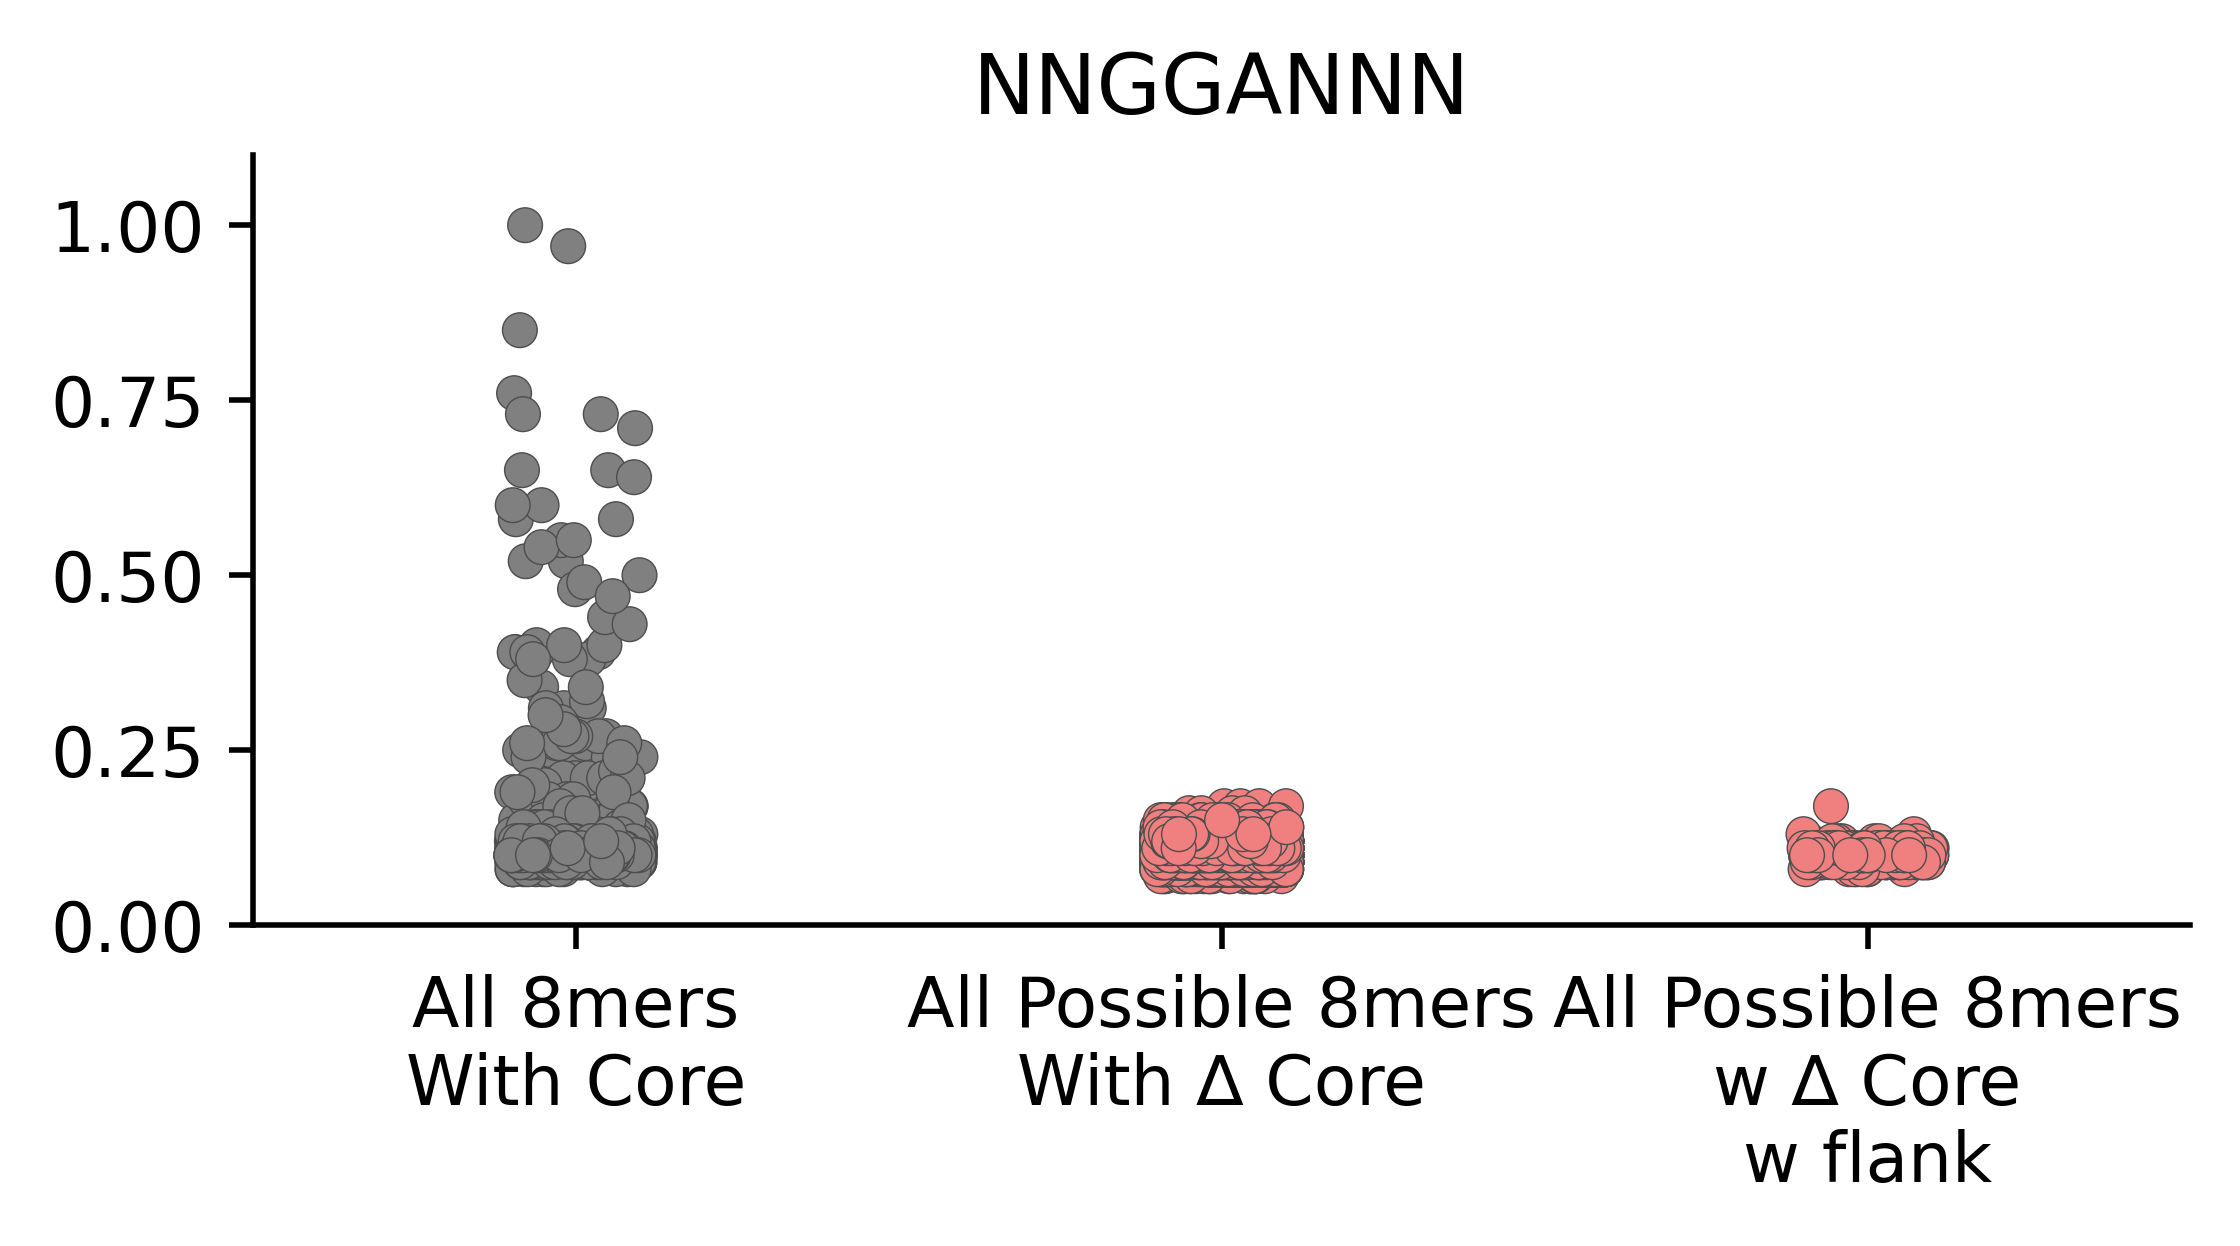

############################################################################
############################################################################
ETS pwm
[[-2.06214644e+00 -8.52948903e-01 -5.64416940e+00 -5.63945586e+00
   1.97803193e+00  1.54873021e+00  6.88093958e-01 -2.84298680e+00]
 [ 1.73651094e+00  1.76668385e+00 -4.30929992e+00 -5.63945586e+00
  -5.63314708e+00 -5.33778857e+00 -4.31504008e+00 -2.31690251e-02]
 [-1.38070850e+00 -5.25232867e+00  1.96700961e+00  1.97172315e+00
  -5.63314708e+00 -4.36310183e+00  1.20248887e+00 -2.42022573e+00]
 [-4.49891804e+00 -5.84449516e+00 -5.64416940e+00 -4.73640586e+00
  -5.63314708e+00  1.56424845e-03 -4.74685957e+00  1.42746260e+00]]


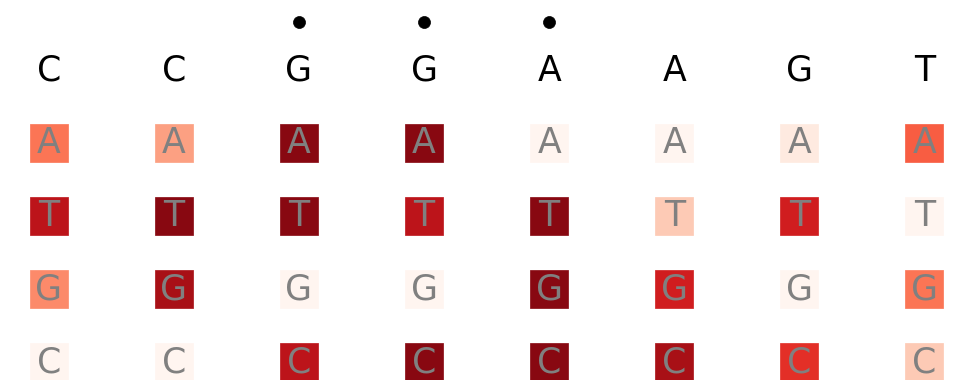

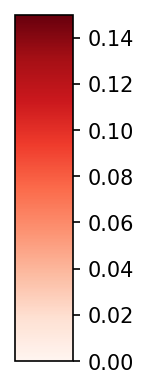

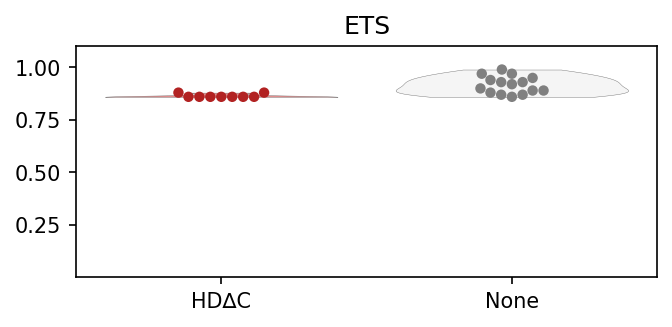

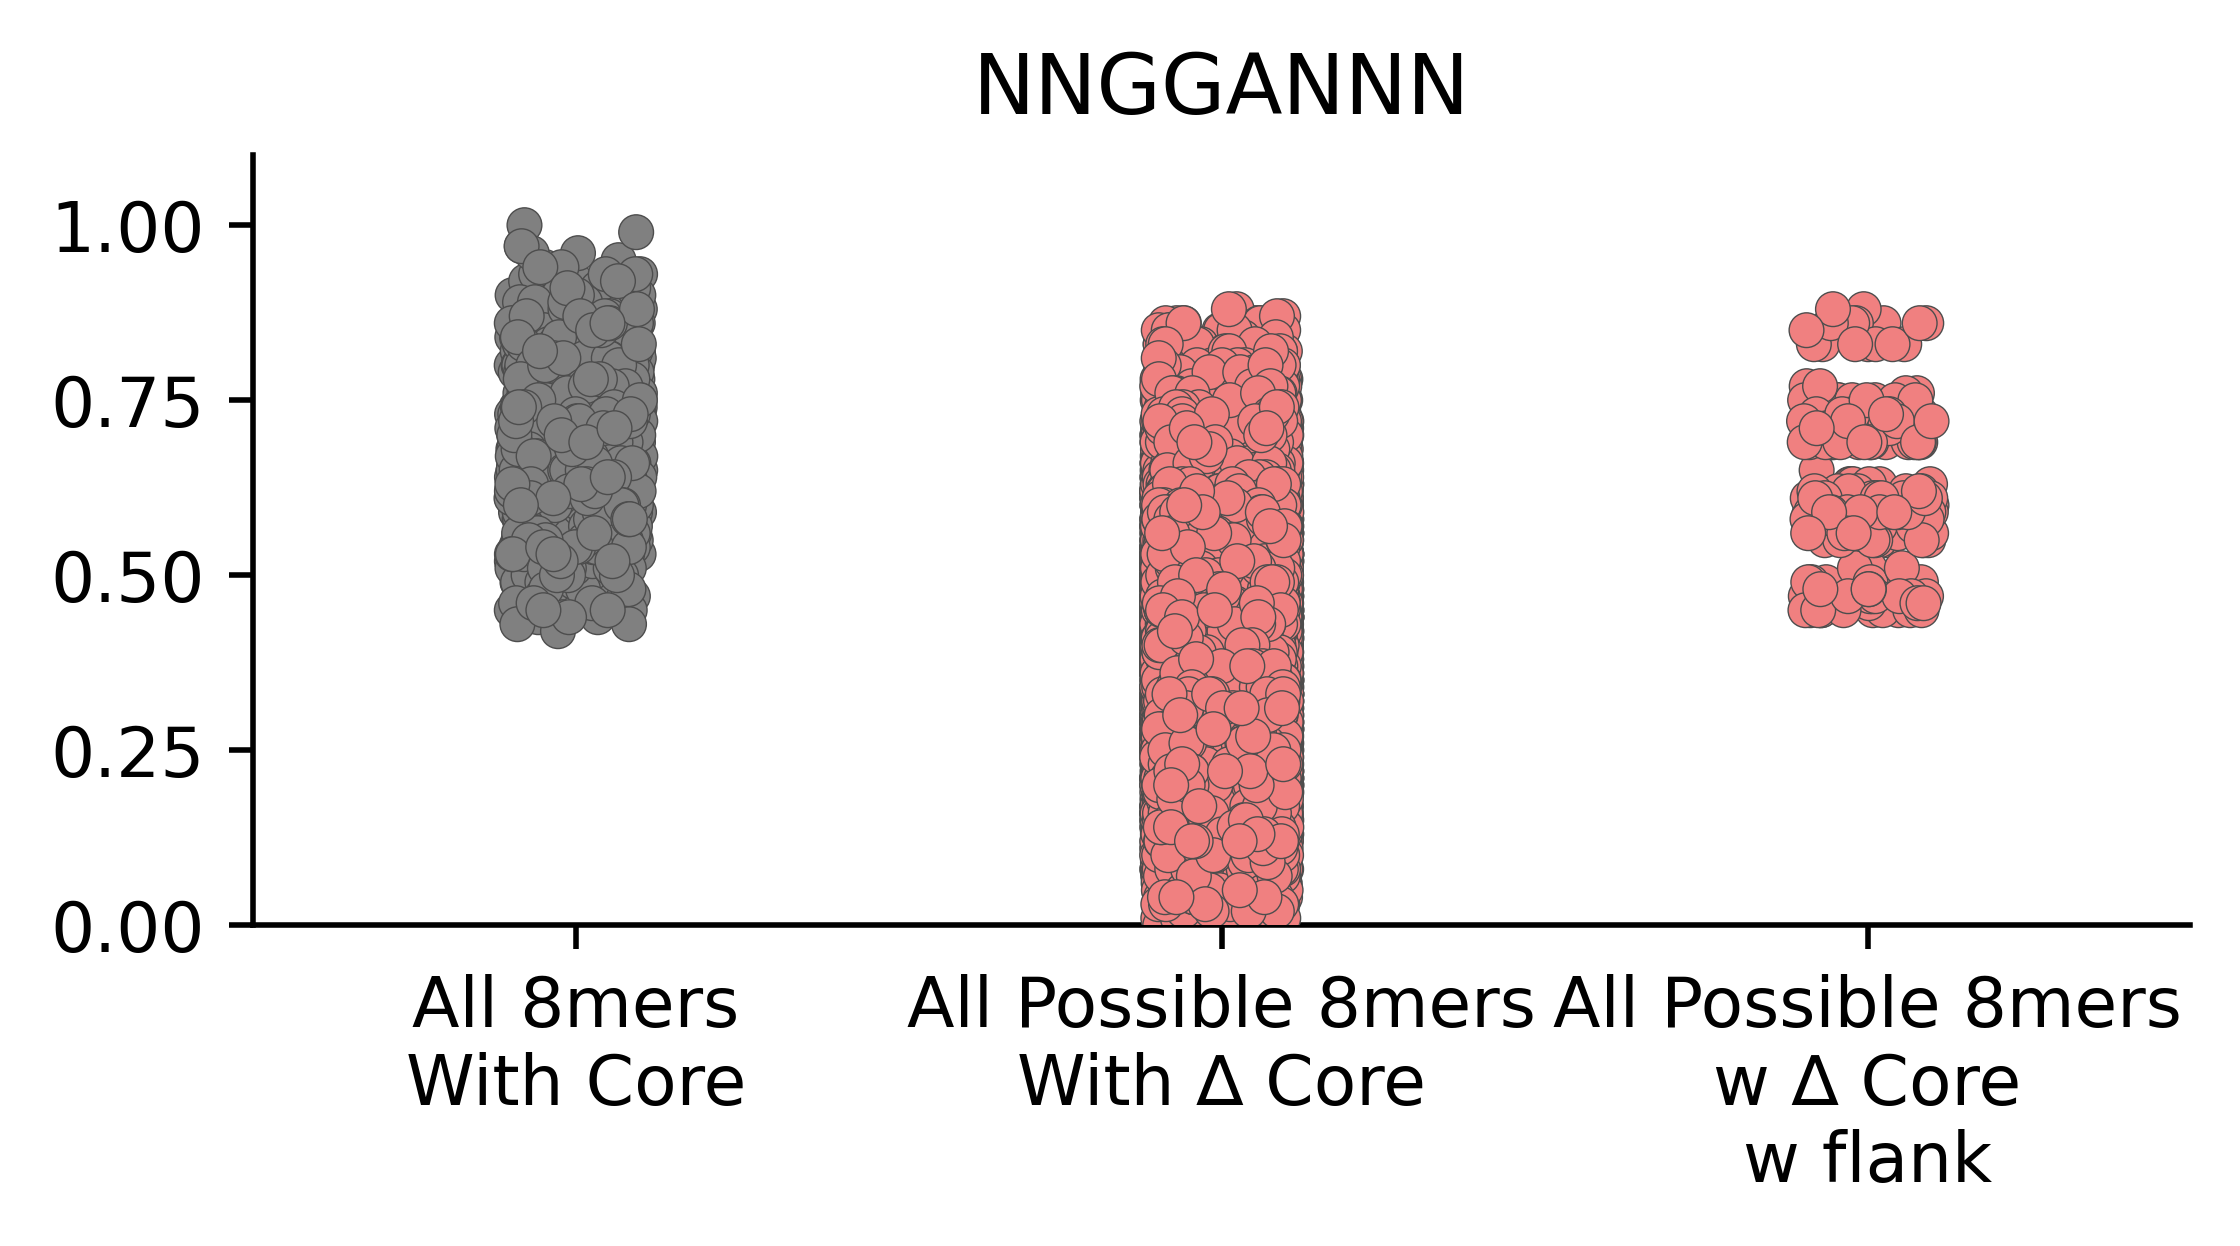

############################################################################
############################################################################
GATA pbm


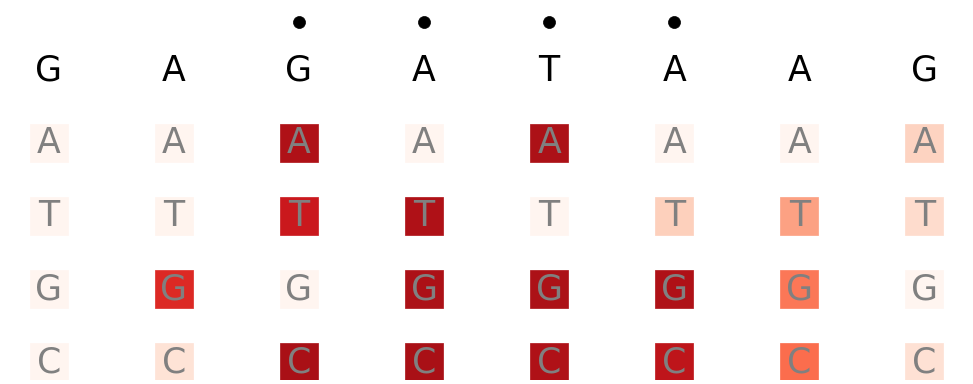

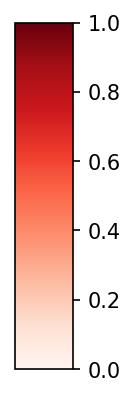

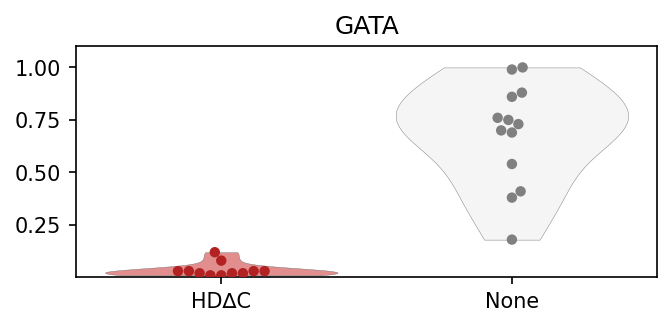

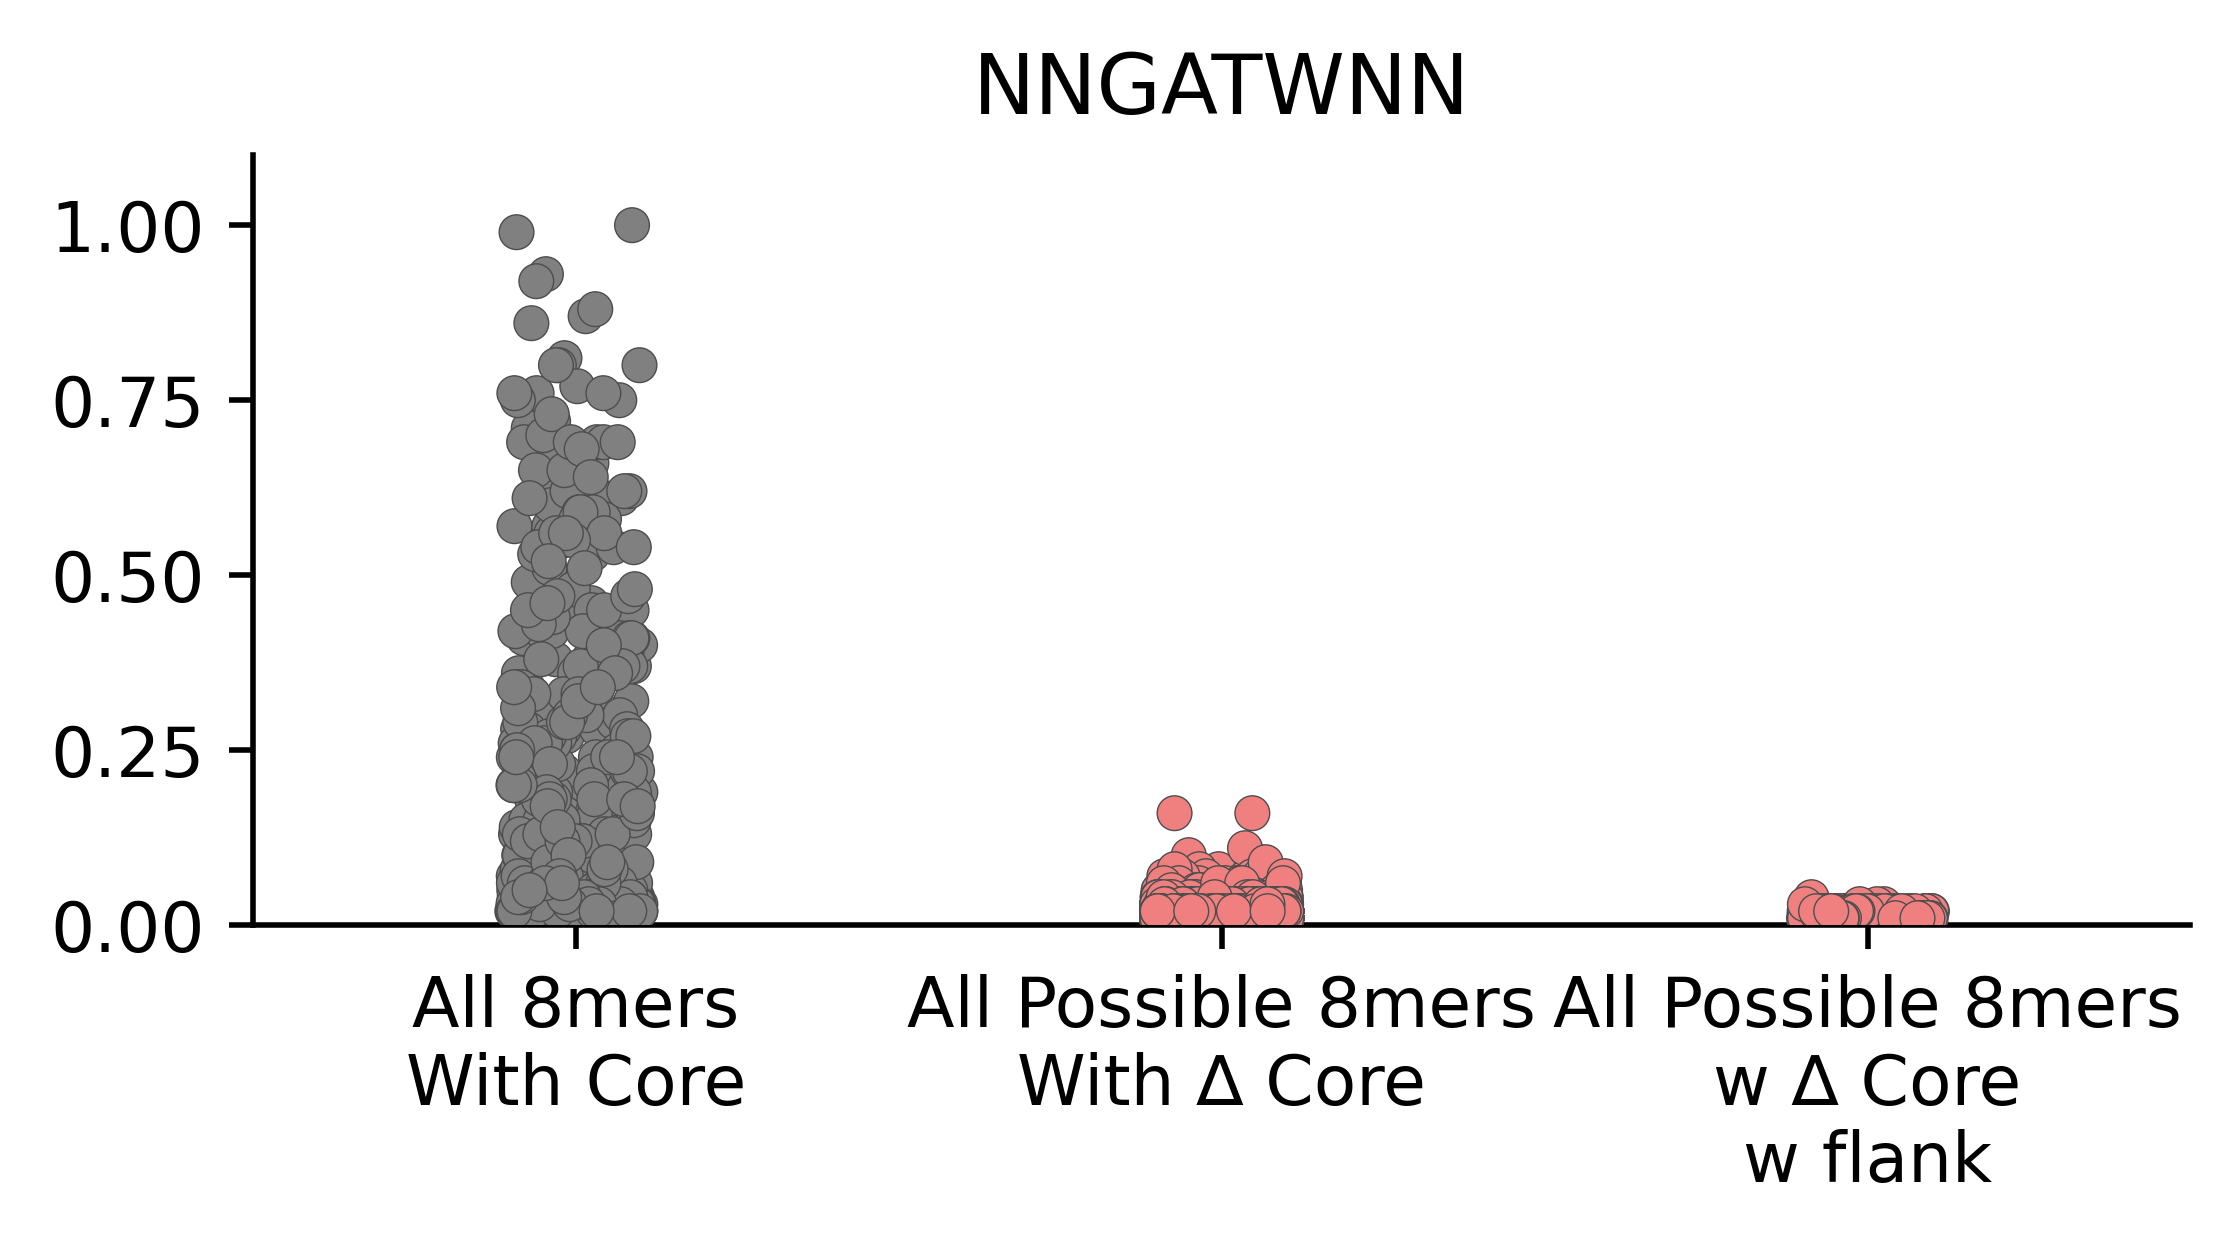

############################################################################
############################################################################
GATA pwm
[[-0.61491844  0.84952674 -6.93005911  1.9910994  -6.93005911  1.96060759
   1.95396868 -4.06259948]
 [ 0.77872906 -0.92131248 -6.93005911 -6.93005911 -6.93005911 -6.96055092
  -6.96718984  0.90469571]
 [-0.11930634 -5.73739475  1.9910994  -6.93005911 -6.93005911 -6.96055092
  -4.10020114  0.93835364]
 [-0.49251655  0.72361746 -6.93005911 -6.93005911  1.9910994  -3.44719908
  -4.07551474 -2.72104734]]


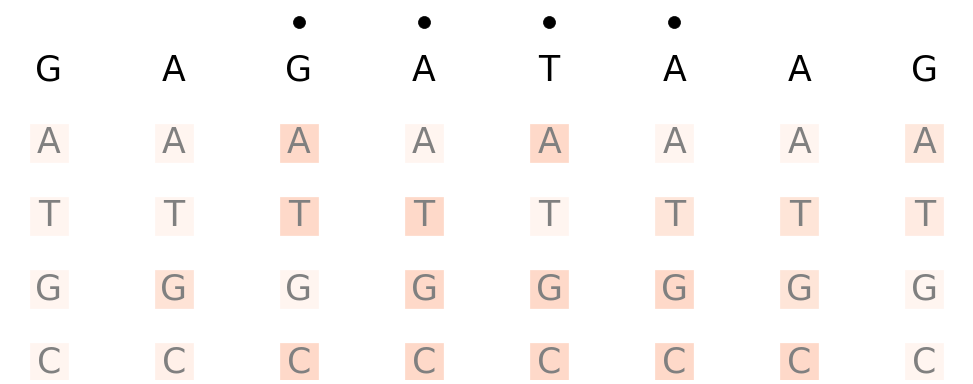

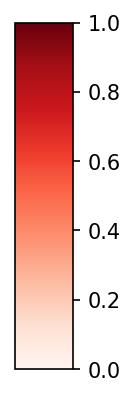

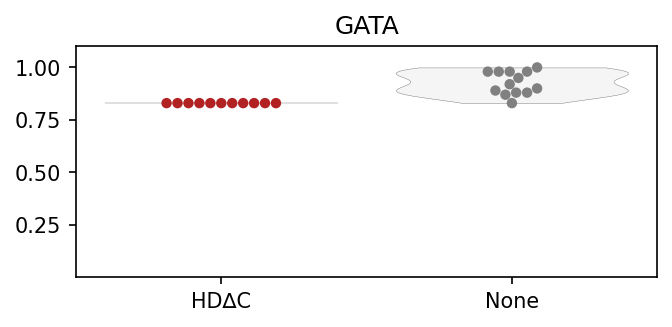

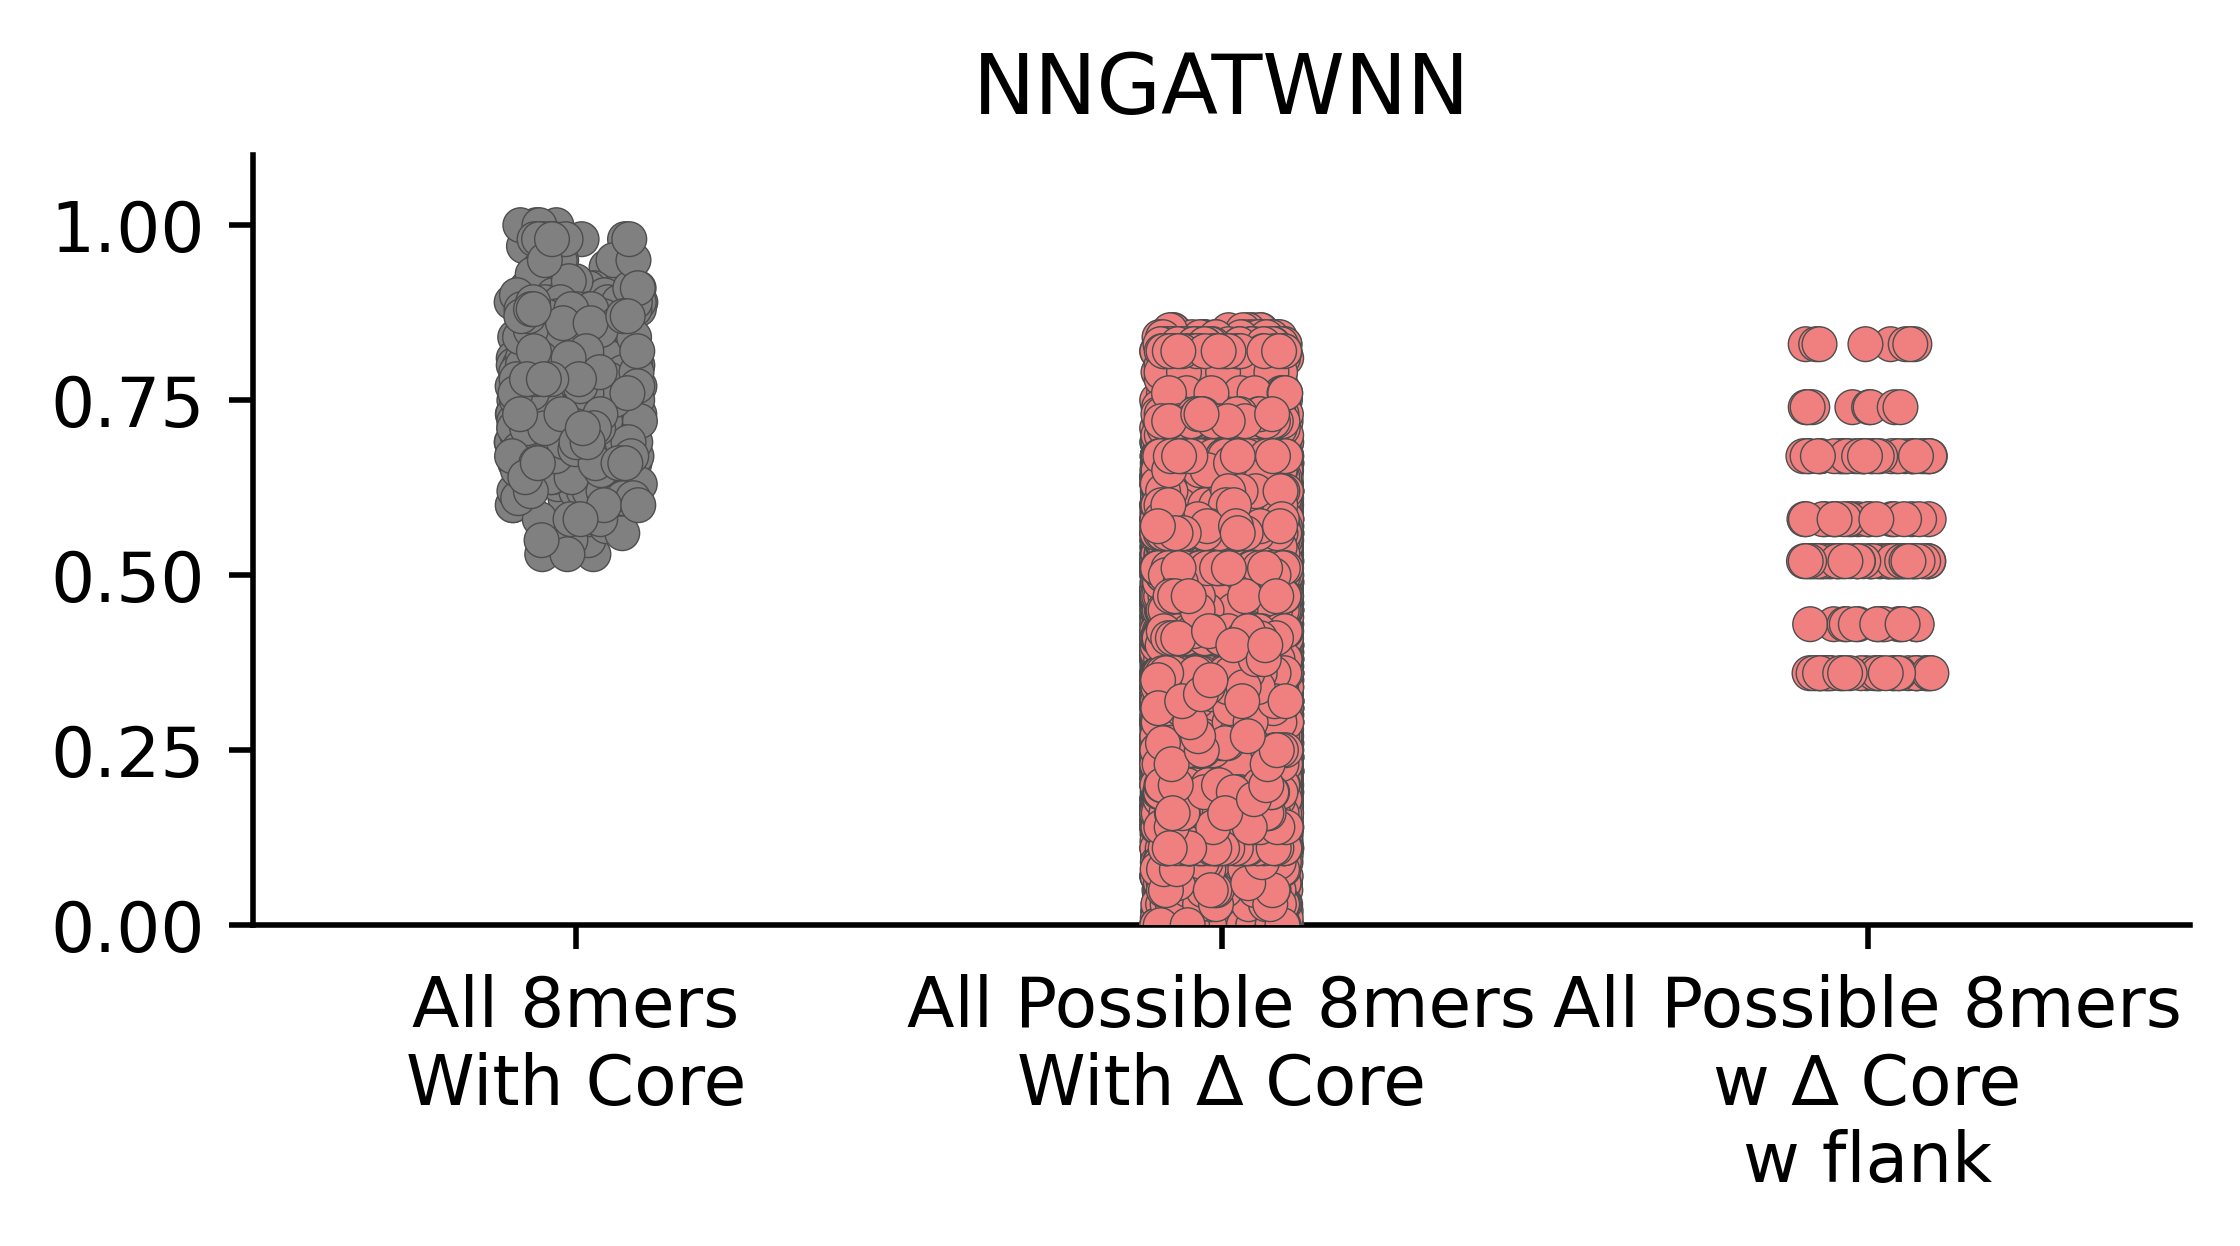

############################################################################
############################################################################
HOXb13 pbm


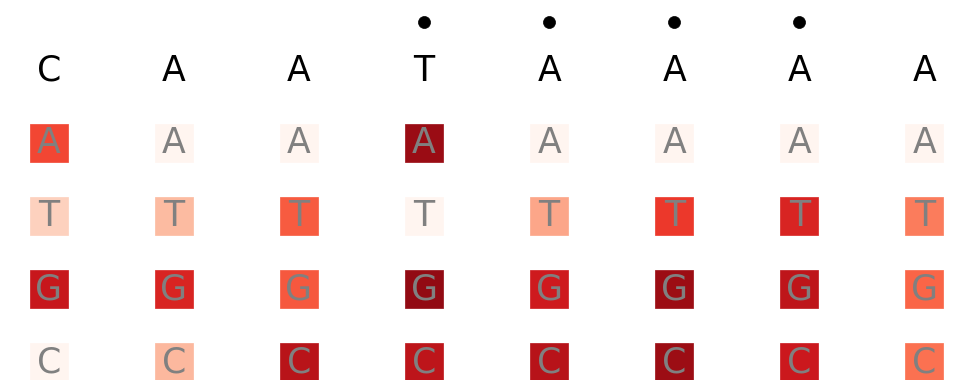

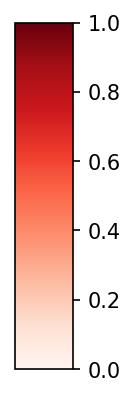

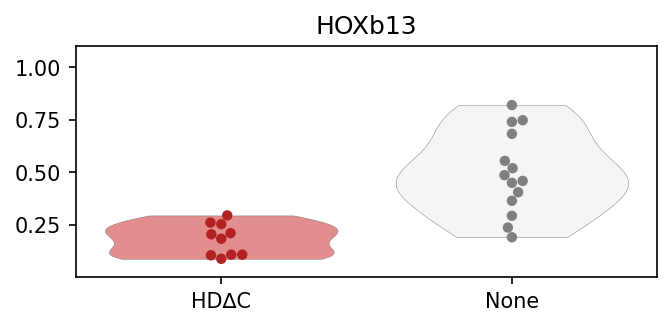

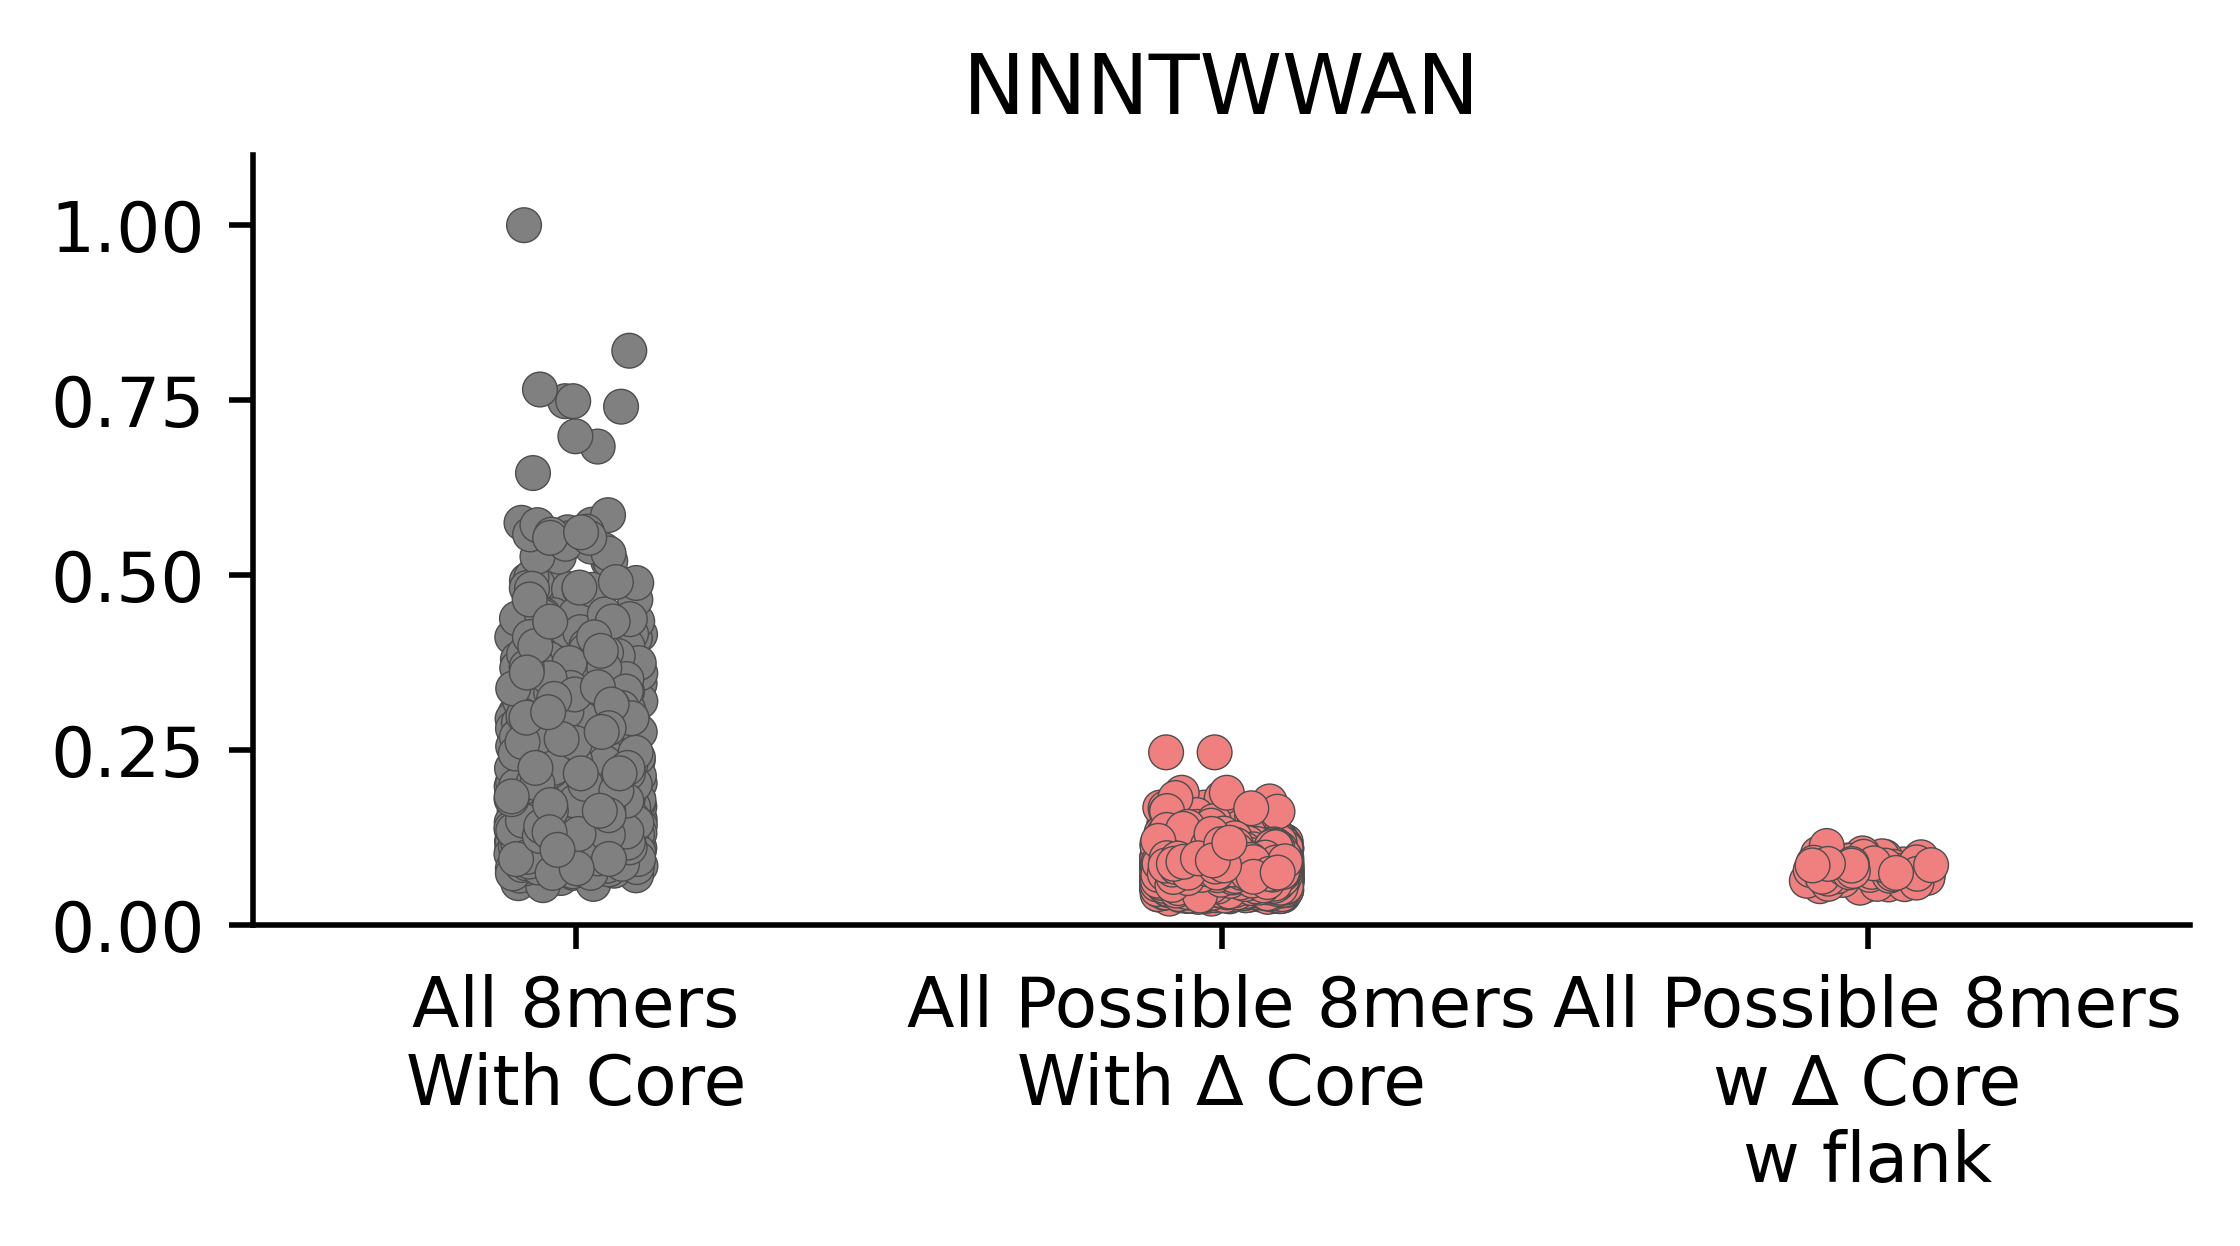

############################################################################
############################################################################
HOXb13 pwm


NO PWM PROVIDED -- SKIPPING


############################################################################
PBX pbm


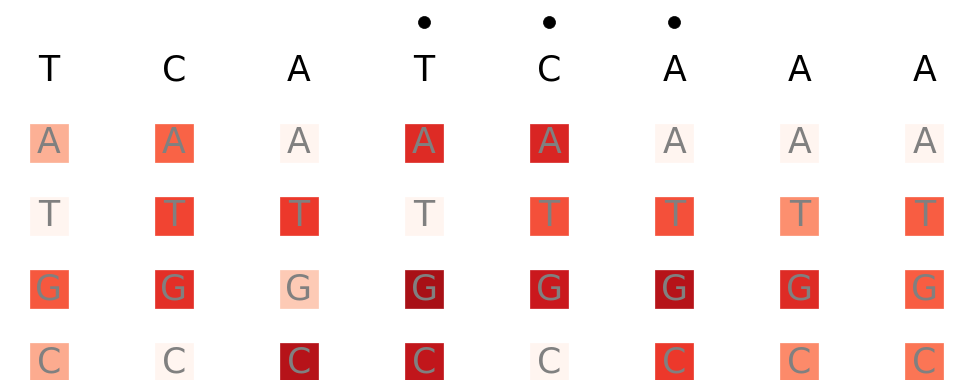

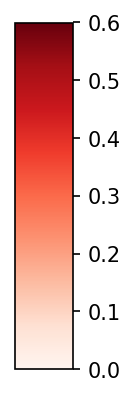

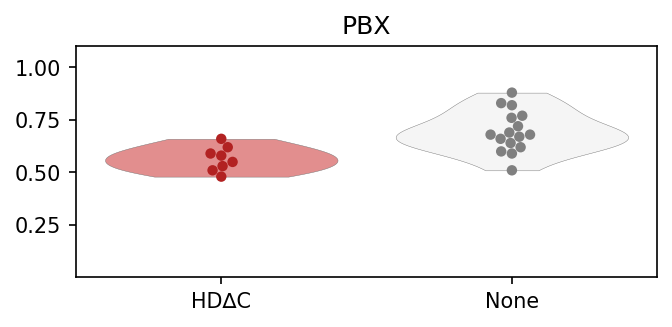

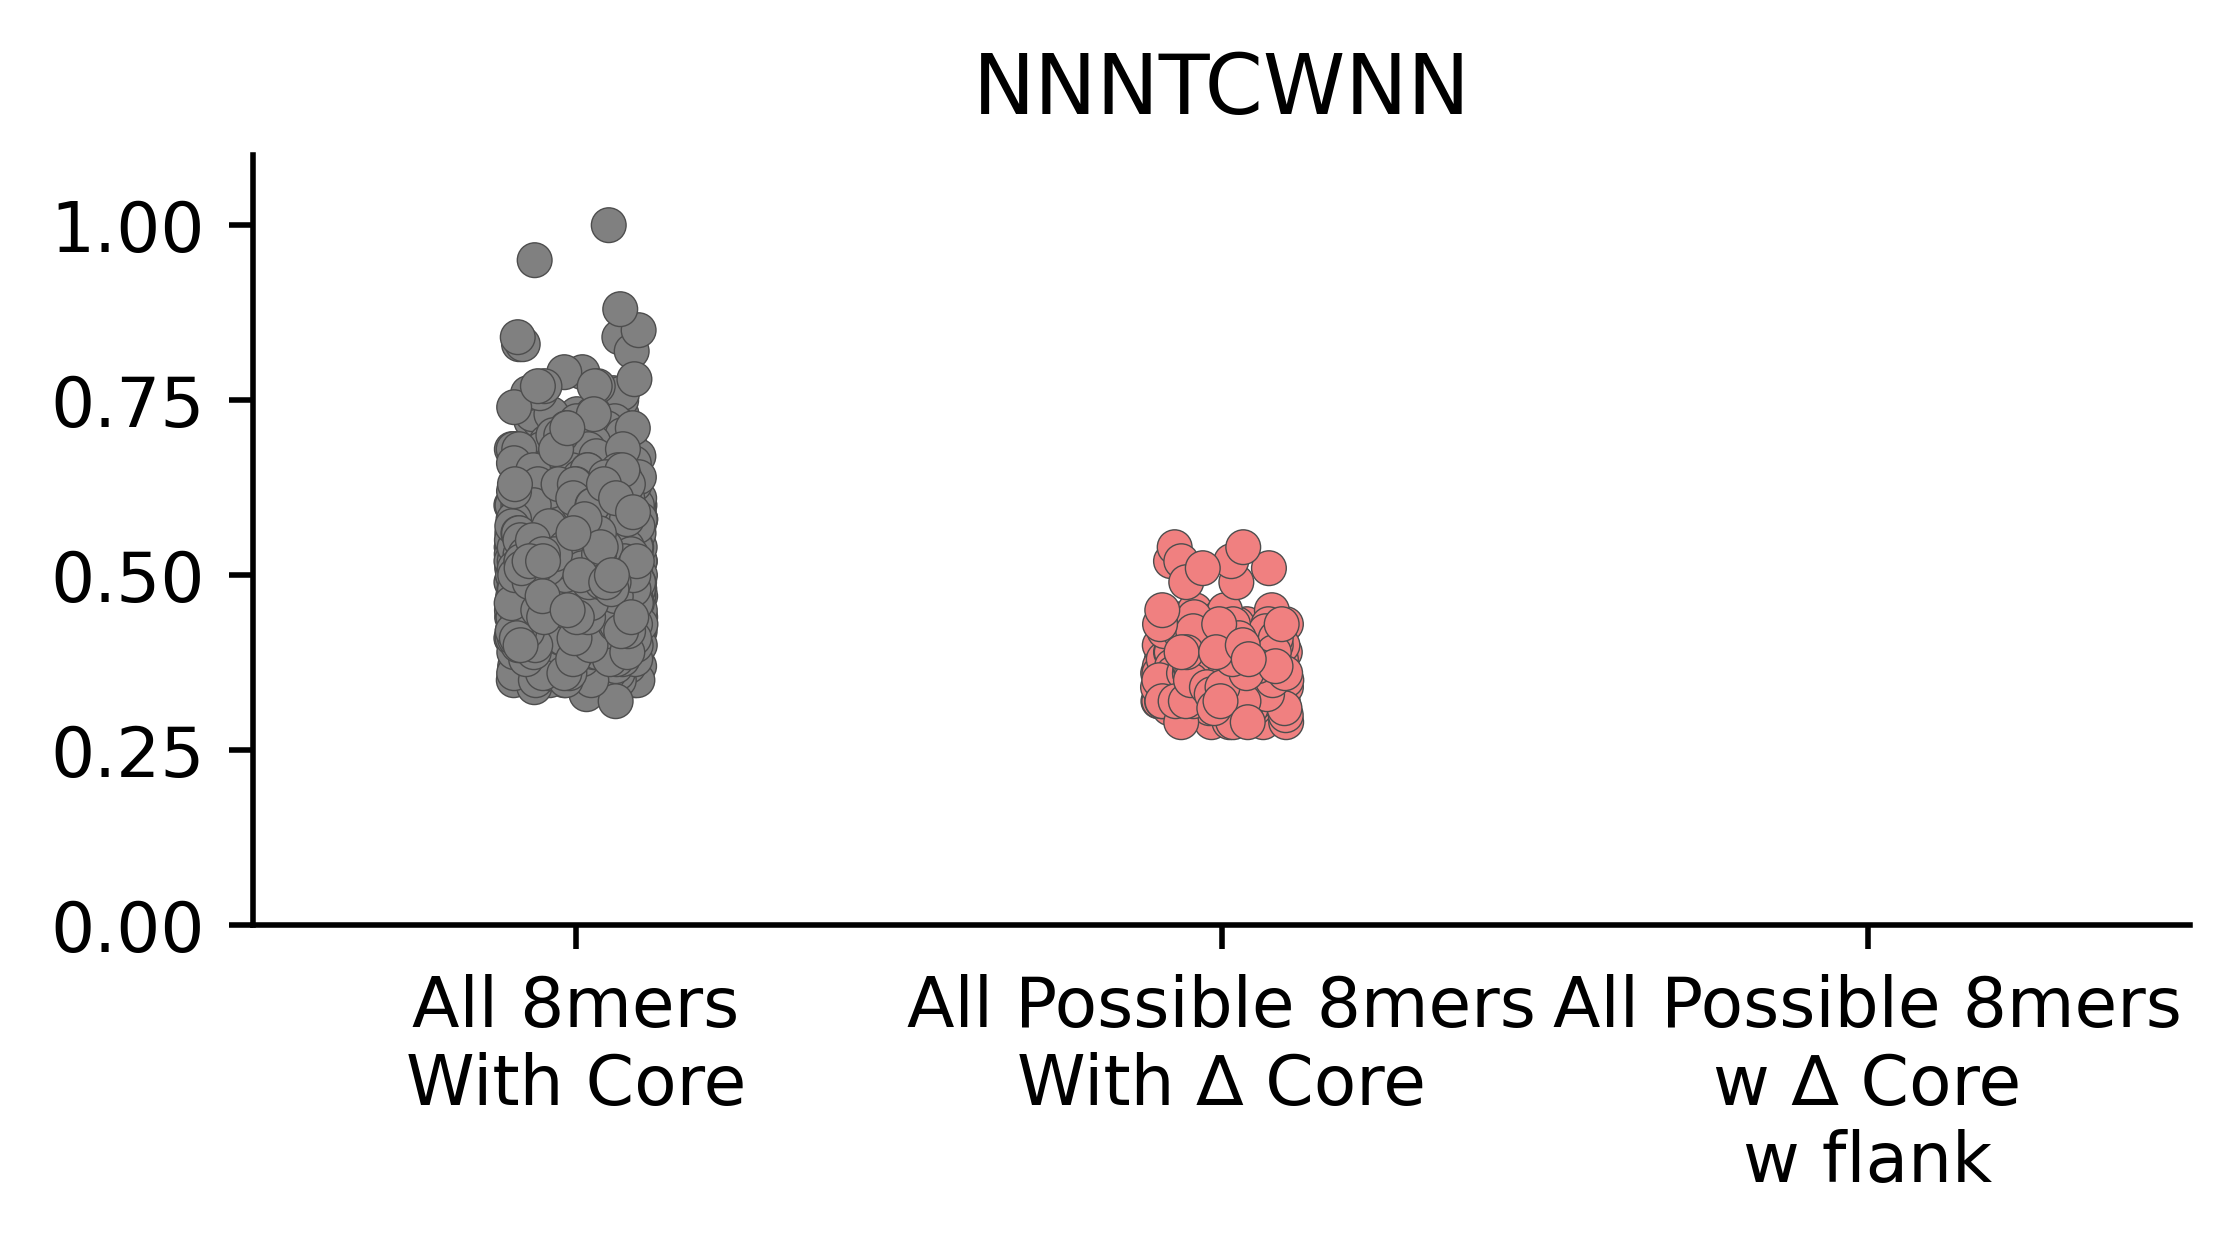

############################################################################
############################################################################
PBX pwm


NO PWM PROVIDED -- SKIPPING


############################################################################
LHX2 pbm


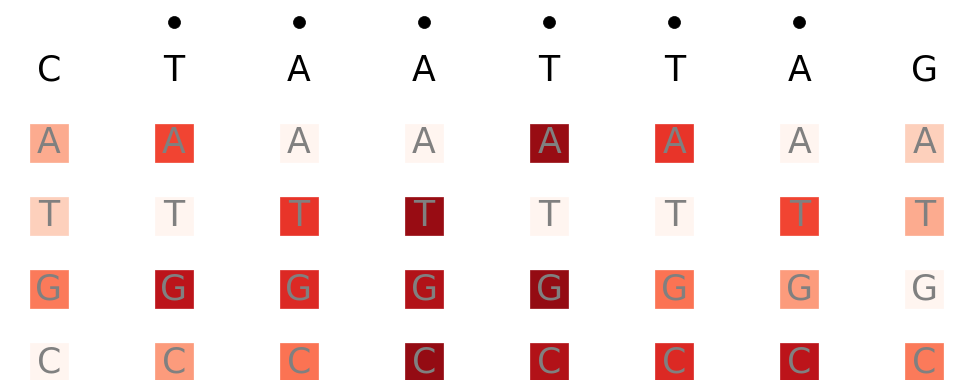

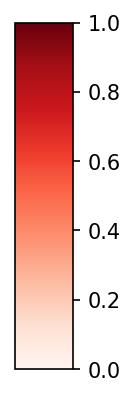

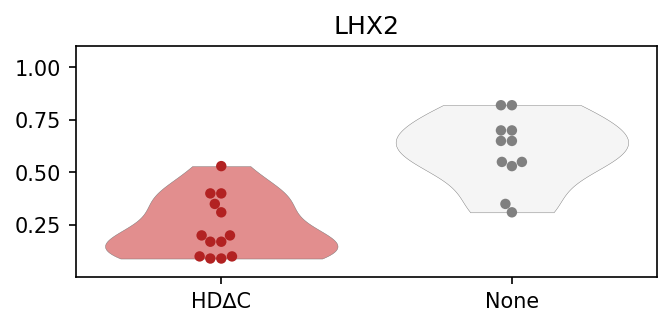

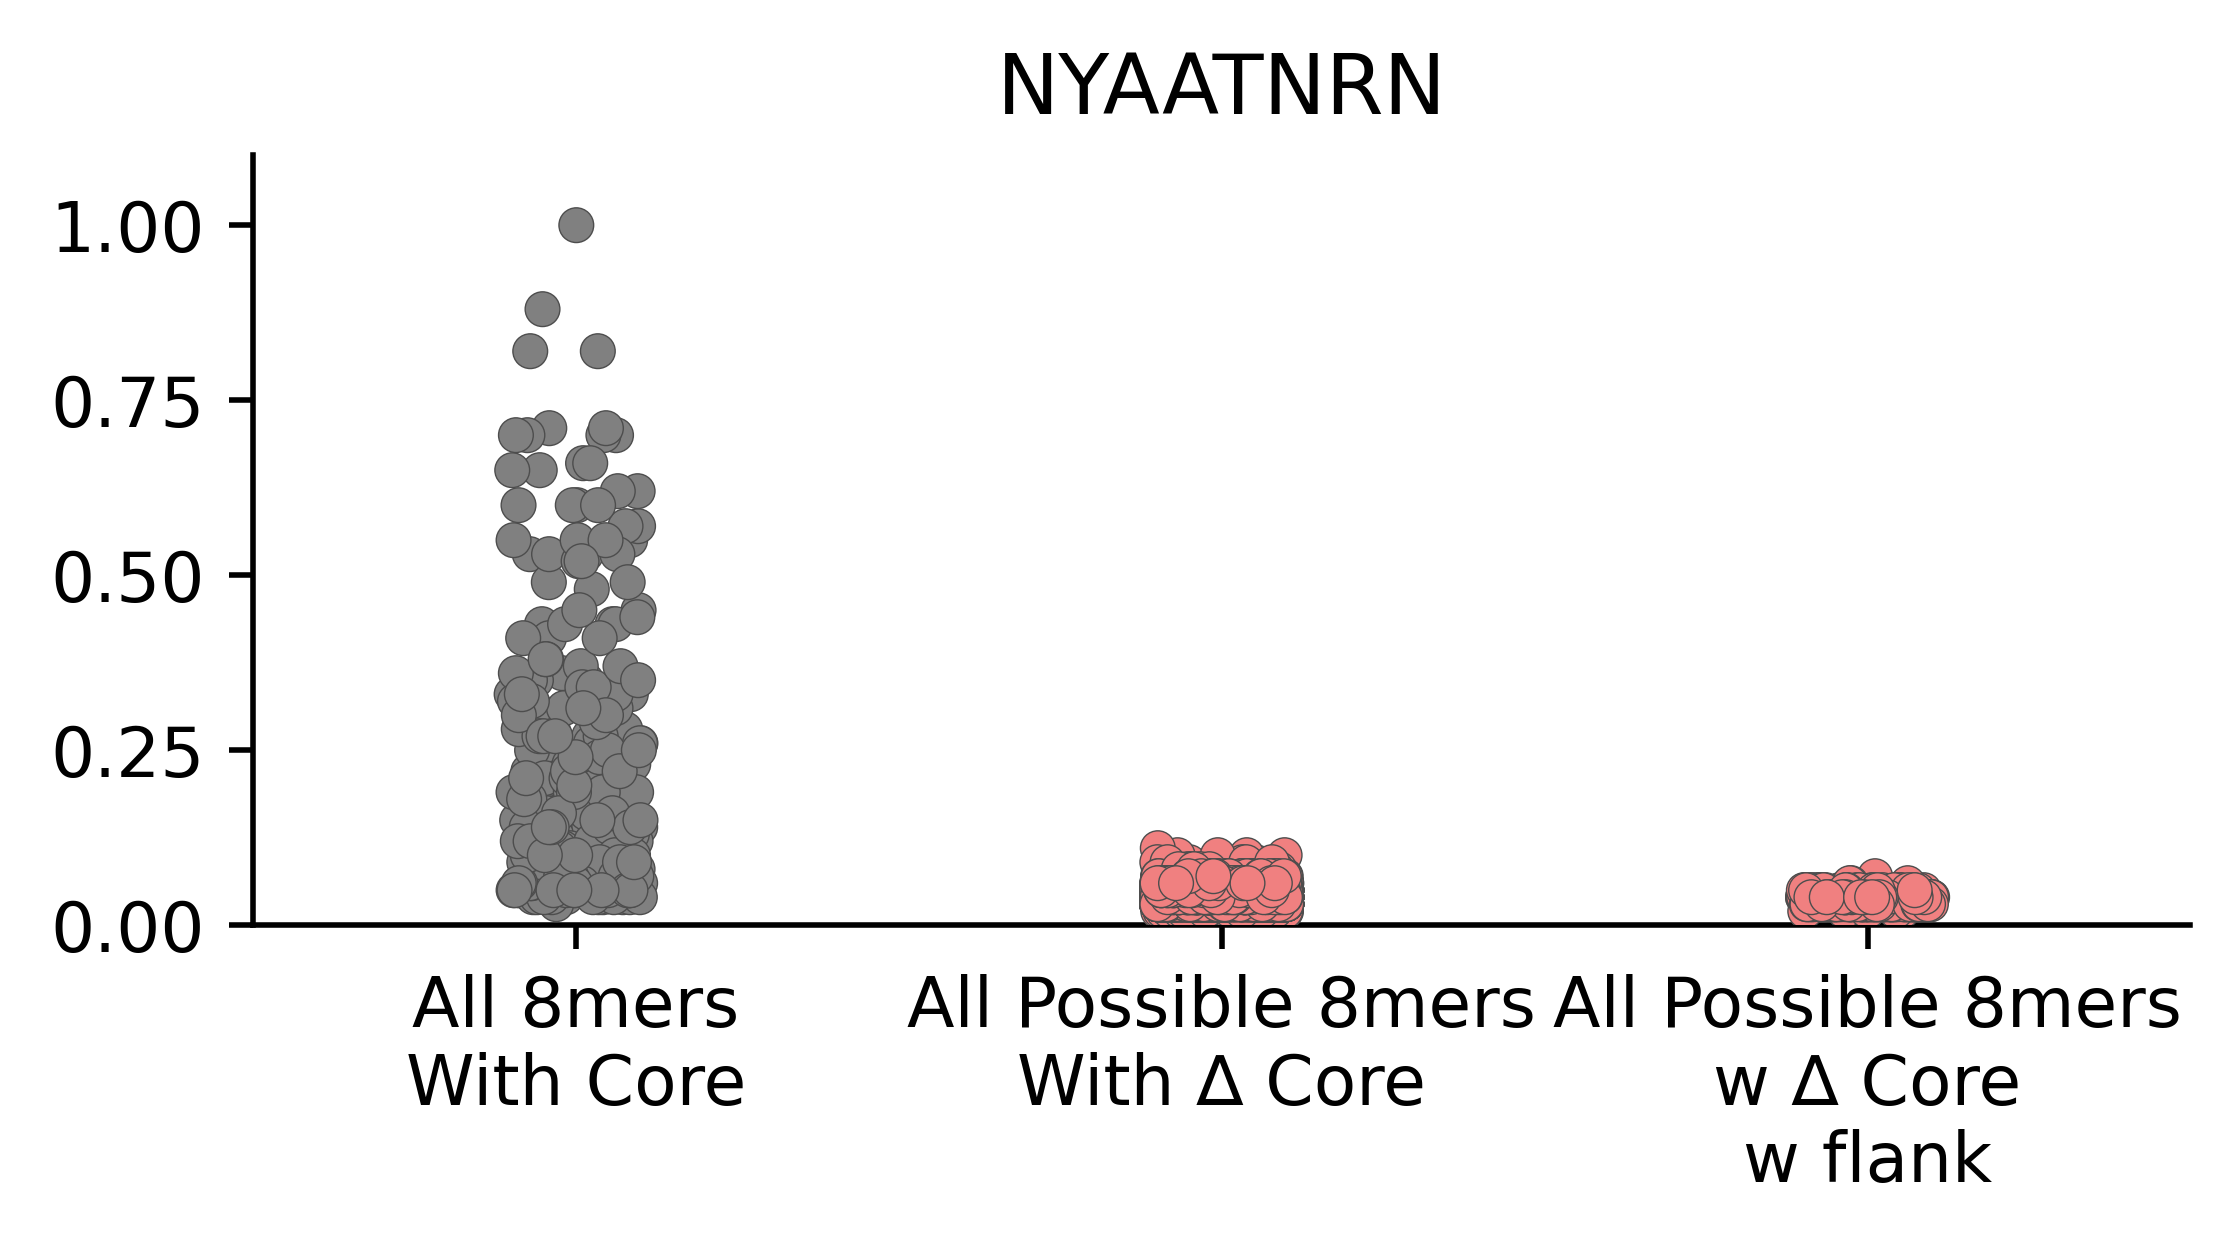

############################################################################
############################################################################
LHX2 pwm
[[-2.13651839 -4.55948549  1.80089916  1.99295832 -7.71066712 -5.38129576
   1.75796254  0.66636734]
 [ 1.52635732 -0.03621931 -1.17808143 -7.71253426 -7.71066712 -3.48770118
  -7.46606463 -0.82336341]
 [-1.37875243 -7.02570258 -5.32912962 -6.65239216 -7.71066712 -2.19201468
  -0.80639462  0.33839215]
 [-0.97867707  1.57274866 -4.35660702 -7.71253426  1.99482545  1.87500041
  -4.63186449 -0.77729774]]


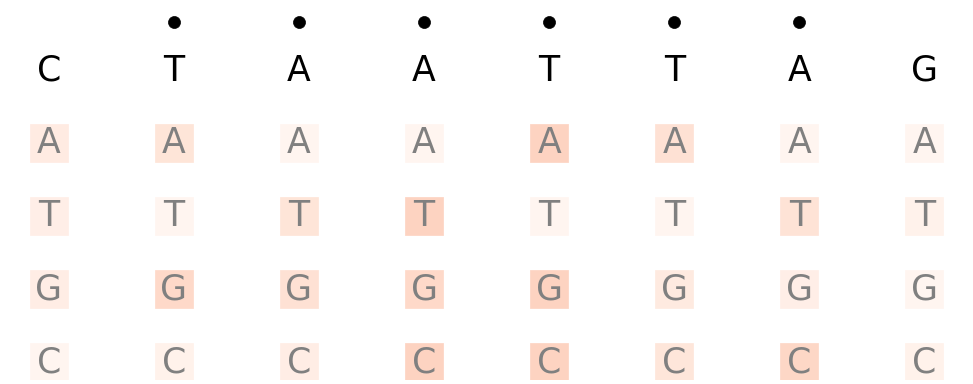

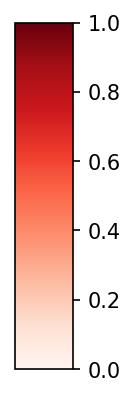

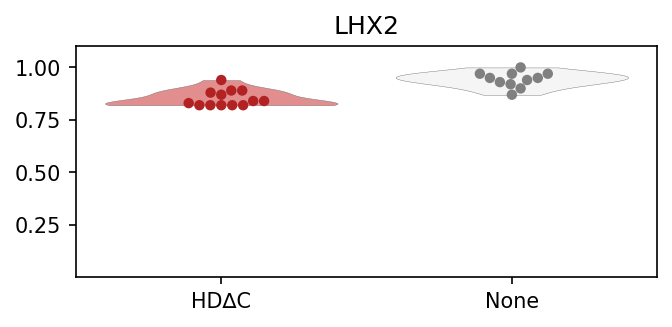

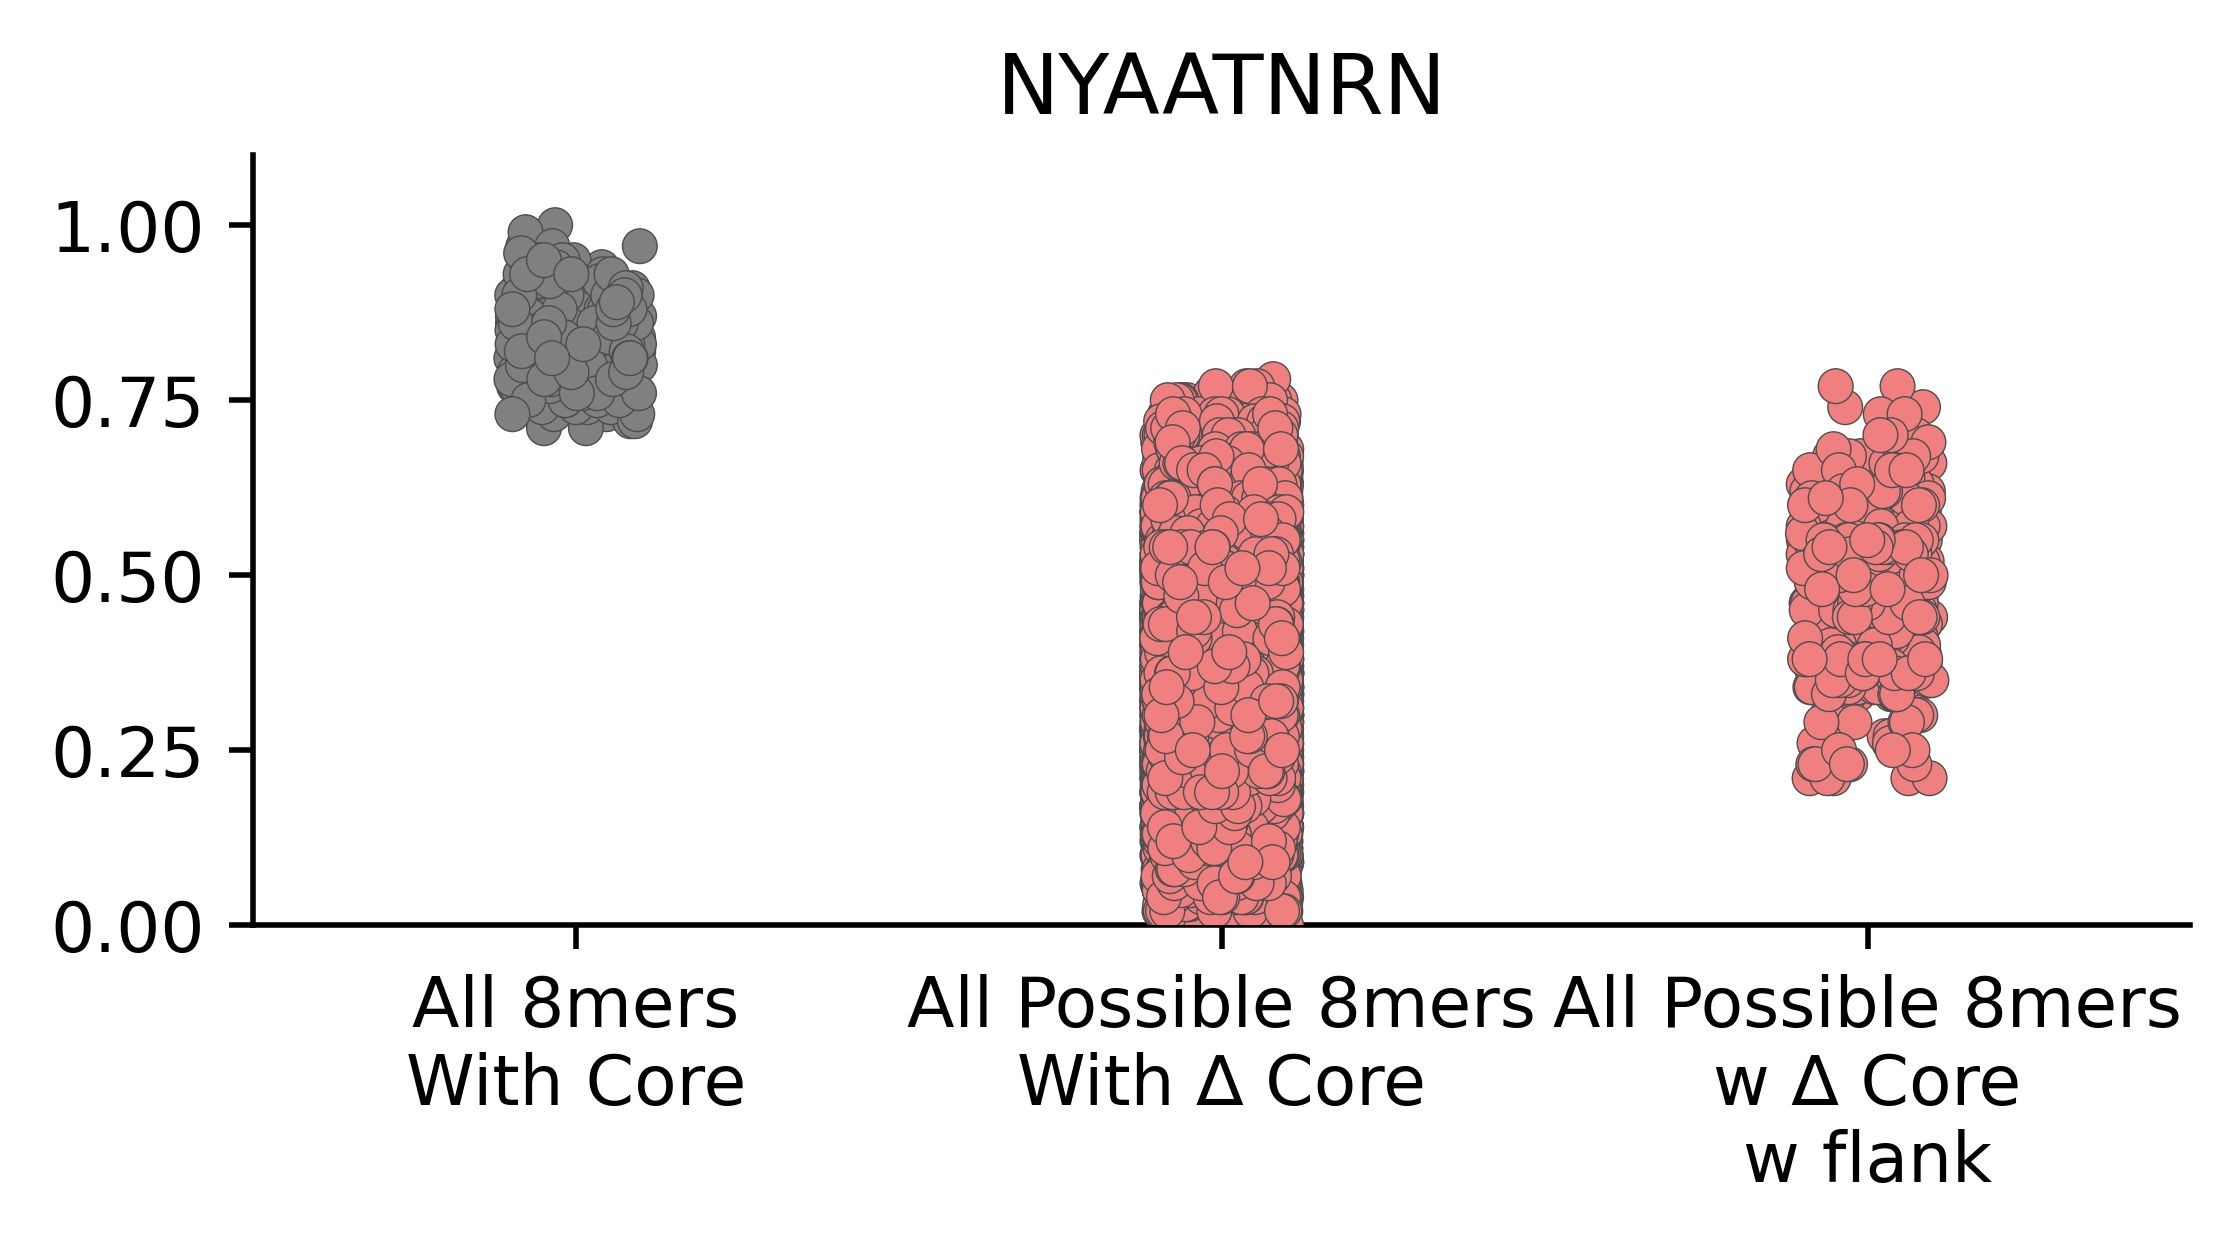

############################################################################


In [5]:
allNts=['A','T','G','C']

dims=(20,8)

plotHeat=True
plotHeatViolins=True
plotAblatedSeqDistributions=True
heatbar=True
combine8merAblatedCores=True
change='delta'

tflist=['ETS','GATA','HOXb13','PBX','LHX2']

for tfi in tflist:

    
    for afftype in ['pbm','pwm']:
        print('############################################################################')
        print(tfi,afftype)

        if (afftype=='pwm') and (str(pwm)=='None'): 
            print ("\n\nNO PWM PROVIDED -- SKIPPING\n\n")
            continue
        
        if afftype not in ['pwm','pbm']: raise ValueError('afftype not allowed')
        
        if tfi=='ETS':
            core='NNGGANNN'
            coreExclusionList=['GGA']
            
            afffn='0-define-tf-sites/ETS_table.tsv'
            siteidx2data={
                0:('N',{'HD':0,'HW':0}),
                1:('N',{'HD':0,'HW':0}),
                2:('G',{'HD':1,'HW':0}),
                3:('G',{'HD':1,'HW':0}),
                4:('A',{'HD':1,'HW':0}),
                5:('N',{'HD':0,'HW':0}),
                6:('N',{'HD':0,'HW':0}),
                7:('N',{'HD':0,'HW':0}),
            }
            consensus=  'CCGGAAGT'
            consensusRE='CCNNNNGT'
            
            if afftype=='pbm':
                vmax=1
            elif afftype=='pwm':
                vmax=.15
            else:
                raise ValueError('afftype not allowed')
        
            pwm=tf.get_pwm_python_object(
                    '0-define-tf-sites/ETS1-MA0098.4.txt',     
                    isAlreadyPwm=False,
                    isFraction=False,
                    trimStart=1,
                    trimEnd=8,
                    pseudocounts=True,
                    pwm_file_format='jaspar',)
            
            minScore,maxScore=tf.all_funcs_get_min_score_of_pwm(pwm),tf.all_funcs_get_max_score_of_pwm(pwm)            
            
        elif tfi=='GATA':
            core='NNGATWNN'
            coreExclusionList=['GAT']
        
            afffn='0-define-tf-sites/GATA_table.tsv'
            siteidx2data={
                0:('N',{'HD':0,'HW':0}),
                1:('N',{'HD':0,'HW':0}),
                2:('G',{'HD':1,'HW':0}),
                3:('A',{'HD':1,'HW':0}),
                4:('T',{'HD':1,'HW':0}),
                5:('W',{'HD':1,'HW':0}),
                6:('N',{'HD':0,'HW':0}),
                7:('N',{'HD':0,'HW':0}),
            }
            
            corestart=2
            coreend=5
            
            pwm=tf.get_pwm_python_object(
                    '0-define-tf-sites/GATA6-HTSELEX-MA0766.2.jaspar',     
                    isAlreadyPwm=False,
                    isFraction=False,
                    trimStart=0,
                    trimEnd=7,
                    pseudocounts=True,
                    pwm_file_format='jaspar',)
            
            minScore,maxScore=tf.all_funcs_get_min_score_of_pwm(pwm),tf.all_funcs_get_max_score_of_pwm(pwm)
            
            consensus=  'GAGATAAG'
            consensusRE='GANNNNAG'

            vmax=1
            
        elif tfi=='HOXb13':
            core='NNNTWWAN'
            coreExclusionList=['RTWW','RTW','TWW']
        
        
            afffn='/Users/joe/code/ref/binding_affinity/hoxb13/parsed_Hoxb13_3479.1_contig8mers_core=NNATWWAN_max=CAATAAAA.txt'
            siteidx2data={
                0:('N',{'HD':0,'HW':0}),
                1:('N',{'HD':0,'HW':0}),
                2:('R',{'HD':0,'HW':0}),
                3:('T',{'HD':1,'HW':0}),
                4:('W',{'HD':1,'HW':0}),
                5:('W',{'HD':1,'HW':0}),
                6:('A',{'HD':1,'HW':0}),
                7:('N',{'HD':0,'HW':0}),
            }
            
            corestart=2
            coreend=6
            pwm=None
            consensus='CAATAAAA'
            consensusRE='CANNNNAA'
            vmax=1
            
        elif tfi=='LHX2':
            core=       'NYAATNRN'
            consensus=  'CTAATTAG'
            consensusRE='CNNNNTNG'
            
            coreExclusionList=['ATK','YAA']
        
            afffn='0-define-tf-sites/LHX_table.tsv'
            siteidx2data={
                0:('N',{'HD':0,'HW':0}),
                1:('Y',{'HD':1,'HW':0}),
                2:('A',{'HD':1,'HW':0}),
                3:('A',{'HD':1,'HW':0}),
                4:('T',{'HD':1,'HW':0}),
                5:('N',{'HD':1,'HW':0}),
                6:('R',{'HD':1,'HW':0}),
                7:('N',{'HD':0,'HW':0}),
            }
            
            corestart=3
            coreend=5
            pwm=tf.get_pwm_python_object(
                    '0-define-tf-sites/lhx2-htselex-MA0700.1.txt',     
                    isAlreadyPwm=False,
                    isFraction=False,
                    trimStart=1,
                    trimEnd=8,
                    pseudocounts=True,
                    pwm_file_format='jaspar',)
            
            minScore,maxScore=tf.all_funcs_get_min_score_of_pwm(pwm),tf.all_funcs_get_max_score_of_pwm(pwm)

            vmax=1

        elif tfi=='MSX1':
            core=       'NYAATNRN'
            consensus=  'CTAATTAG'
            consensusRE='CNNNNTNG'
            
            coreExclusionList=['ATK','YAA']
        
            afffn='0-define-tf-sites/MSX_table.tsv'
            siteidx2data={
                0:('N',{'HD':0,'HW':0}),
                1:('Y',{'HD':1,'HW':0}),
                2:('A',{'HD':1,'HW':0}),
                3:('A',{'HD':1,'HW':0}),
                4:('T',{'HD':1,'HW':0}),
                5:('N',{'HD':1,'HW':0}),
                6:('R',{'HD':0,'HW':0}),
                7:('N',{'HD':0,'HW':0}),
            }
            
            corestart=3
            coreend=5
            pwm=None
            vmax=1
            
        elif tfi=='PBX':
            core=       'NNNTCWNN'
            consensusRE='TCANNNAA'
            coreExclusionList=['RT','TC','CW']
        
            afffn='0-define-tf-sites/Pbx_table.tsv'
            siteidx2data={
                0:('N',{'HD':0,'HW':0}),
                1:('N',{'HD':0,'HW':0}),
                2:('R',{'HD':0,'HW':0}),
                3:('T',{'HD':1,'HW':0}),
                4:('C',{'HD':1,'HW':0}),
                5:('W',{'HD':1,'HW':0}),
                6:('N',{'HD':0,'HW':0}),
                7:('N',{'HD':0,'HW':0}),
            }
            
            corestart=3
            coreend=4
            pwm=None
            
            consensus='TCATCAAA'
            
            vmax=.6
            
        else:
            raise ValueError(f'tf {tfi} not supported')
           
        if afftype=='pwm':
            print(pwm)

        if len(core)!=8: raise ValueError('core not 8 bp long')
        
        # get re object for kmer searching
        corepat=fxn.IupacToRegexPattern(core)
            
        # load data
        seq2aff = tf.loadNormalizedFile(afffn)
        topaff=sorted([(a,s,fxn.revcomp(s)) for s,a in seq2aff.items()],reverse=True)[0]
        
        if change not in ['fc','delta']: raise ValueError('the change parameter must be one of the following: fc or delta')
        
        hbondIncrease=.2
        heatmapystart=-.3
        heatmapystep=-.3
        if plotHeat:
            fig,ax=fxn.quickfig(dims[0],dims[1],dpi=50)
        
        ablatedSeqAffs=[]
        
        ################################################
        # plot the text and the number of hbonds
        ################################################
        ymax=0
        for siteidx,(nt,htype2count) in siteidx2data.items():
            
            consensusnt=consensus[siteidx]
            if plotHeat:
                ax.text(siteidx,0,consensusnt,ha='center',va='center',size=50)
            
            yi=hbondIncrease
            for htype, count in htype2count.items():
                for ci in range(count):
                    if htype=='HD': color='black'
                    elif htype=='HW': color='deepskyblue'
                    else: raise ValueError("")
                    if plotHeat: ax.scatter(siteidx,yi,color=color,s=300)
                    yi+=hbondIncrease
                    if yi>ymax: ymax=yi
                            
        ################################################
        # plot heat map of mutations
        ################################################
        
        if afftype=='pbm':
            consensusAff=seq2aff[consensus]
        elif afftype=='pwm' and str(pwm)=='None':
            raise ValueError(f'PWM not provided for {tfi}')
        elif afftype=='pwm':
            consensusAff=tf.all_funcs_get_score_of_kmer(pwm, consensus, maxScore, minScore)
        else:
            raise ValueError('afftype not allowed')
                    
        idxhtype2effect={htype:[] for htype in ['HD∆C','HD=C','None']}
        idxhtype2finalAff={htype:[] for htype in ['HD∆C','HD=C','None']}
        
        ablatedCore8merList=[]
    
        c2v={c:[] for c in ['8mer','pos','ref','alt','affinity','core-present']}
        c2vb={c:[] for c in ['8mer','affinity','core-present']}
    
        
        for siteidx,nt in enumerate(consensus):
            
            # determine type of site
            hd=siteidx2data[siteidx][1]['HD']
            hw=siteidx2data[siteidx][1]['HW']
            
            if hd>0: # if HD+HW, override with HD
                idxhtype='HD'
            elif hw>0:
                idxhtype='HD' # for now, just do direct h bonds
            else:
                idxhtype="None"
            
            for yi,mutnt in enumerate(allNts):
                
                seqTested = consensus[:siteidx]+mutnt+consensus[siteidx+1:]
                
                if afftype=='pbm':
                    affTested = seq2aff[seqTested]
                elif afftype=='pwm':
                    affTested=tf.all_funcs_get_score_of_kmer(pwm, seqTested, maxScore, minScore)
                else:
                    raise ValueError('afftype not allowed')
                    
                if idxhtype in ['HD','HW']: 
                    
                    # if position is in core but core isn't ablated, use HD=C type
                    if re.search(corepat,seqTested): 
                        # newidxhtype=f'{idxhtype}=C'
                        newidxhtype=f'None'
                    
                    # if core is changed, then use HD∆C type
                    else: 
                        newidxhtype=f'{idxhtype}∆C'
                        ablatedSeqAffs.append(affTested)
                        ablatedCore8merList.append(seqTested)
                        # print(f'\tABL CORE\t{seqTested}\t{round(affTested,2)}')
    
                else:
                    newidxhtype=idxhtype
                    
                    
                
                if change=='fc':      
                    alpha=1-affTested/consensusAff
    
                elif change=='delta': 
                    alpha=consensusAff-affTested
                
                # only add effect to dotplot if its truly a mutation
                if nt!=mutnt:
                    idxhtype2effect[newidxhtype].append(alpha)
                    idxhtype2finalAff[newidxhtype].append(affTested)
                
                if plotHeat:
                    ax.text(   siteidx,heatmapystart+heatmapystep*yi,mutnt,ha='center',va='center',size=50,color='grey')
                    ax.scatter(siteidx,heatmapystart+heatmapystep*yi,c=alpha,cmap='Reds',s=3000,marker='s',vmin=0,vmax=vmax)
    
                # fill table
                corelabel={'HD∆C':'Ablation','HW∆C':'Ablation','None':''}
                c2v['8mer'].append(seqTested)
                c2v['pos'].append(yi+1)
                c2v['ref'].append(nt)
                c2v['alt'].append(mutnt)
                c2v['affinity'].append(affTested)
                c2v['core-present'].append(corelabel[newidxhtype])
    
                
        if plotHeat:
            plt.tight_layout()
    
            fxn.clearspines(ax,sides=['top','right','bottom','left'])
            fxn.clearticks(ax)
    
            plt.savefig(f"0-define-tf-sites/out-svgs//{tfi}-{afftype}-heatmap.svg", format="svg")
    
            plt.show()
            
            if heatbar: 
                fig,ax=fxn.quickfig(.5,3)
                # Create a ScalarMappable for the colorbar
                norm = mpl.colors.Normalize(0,vmax)
                sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
                sm.set_array([])  # Important for the colorbar to work
    
                # Remove the legend and add a colorbar
                ax.figure.colorbar(sm,cax=ax)
                plt.savefig(f"0-define-tf-sites/out-svgs//{tfi}-{afftype}-heatmap-cbar.svg", format="svg")
    
                plt.show()
    
        # write table
        outdf=pd.DataFrame(c2v)
        outdf.sort_values('8mer').to_csv(f'0-define-tf-sites/out-tables/01a-consensus-mutagenesis-{tfi}-{afftype}.csv',index=None)
        
        ################################################
        # also plot summary 
        ################################################
        
        if plotHeatViolins:
            fig,ax=fxn.quickfig(5,2)
            htypeOrder=['HD∆C','None']
            
            sns.swarmplot(data=[idxhtype2finalAff[htype] for htype in htypeOrder],palette=['firebrick','grey','grey'])
            sns.violinplot(data=[idxhtype2finalAff[htype] for htype in htypeOrder],scale='width',palette=['lightcoral','whitesmoke','whitesmoke'],inner=None,cut=0,linewidth=.2)
            
            ax.set_xticklabels(htypeOrder)
            ax.set_title(tfi)
            plt.savefig(f"0-define-tf-sites/out-svgs//{tfi}-{afftype}-heatmap-violins.svg", format="svg")
            ax.set_ylim(0,1.1)
            ax.set_yticks([.25,.5,.75,1.0])
            if tf=='PBX': ax.set_ylim(0.4,1.0)
            plt.show()
    
                
        #########################################################
        # plot all possible 1-bp mutations of ablated sequences
        #########################################################
    
    
        all8mers=fxn.IupacToAllPossibleSequences('N'*8)
        all8mersWithCore=fxn.IupacToAllPossibleSequences(core)
            
        if afftype=='pbm': 
            all8mersWithCore_affs=[seq2aff[seq] for seq in all8mersWithCore if seq in seq2aff]
        else:              
            all8mersWithCore_affs=[tf.all_funcs_get_score_of_kmer(pwm, seq, maxScore, minScore) for seq in all8mersWithCore]
    
        # remove all kmers with any core (even those that are out of phase)
        noCore8mers=[]
    
        for kmer8 in all8mers:
    
            include8mer=True
    
            for outOfPhaseCore in coreExclusionList:
    
                    re_outOfPhaseCore=fxn.IupacToRegexPattern(outOfPhaseCore)
                    re_outOfPhaseCore_rc=fxn.revcomp_regex(fxn.IupacToRegexPattern(outOfPhaseCore))
    
                    if re.search(re_outOfPhaseCore,kmer8) or re.search(re_outOfPhaseCore_rc,kmer8):
                        include8mer=False
                        
            if include8mer:
                noCore8mers.append(kmer8)
    
        if afftype=='pbm': noCore8mers_affs=[seq2aff[seq] for seq in noCore8mers]
        else:              noCore8mers_affs=[tf.all_funcs_get_score_of_kmer(pwm, seq, maxScore, minScore) for seq in noCore8mers]
    
        # get all sequences with consensus flanks without core
        all8mersConsensus=fxn.IupacToAllPossibleSequences(consensusRE)
        all8mersConsensus_nocore=[]
        for kmer8 in all8mersConsensus:
    
            include8mer=True
    
            for outOfPhaseCore in coreExclusionList:
    
                    re_outOfPhaseCore=fxn.IupacToRegexPattern(outOfPhaseCore)
                    re_outOfPhaseCore_rc=fxn.revcomp_regex(fxn.IupacToRegexPattern(outOfPhaseCore))
    
                    if re.search(re_outOfPhaseCore,kmer8) or re.search(re_outOfPhaseCore_rc,kmer8):
                        include8mer=False
                        
            if include8mer:
                all8mersConsensus_nocore.append(kmer8)    
    
        if afftype=='pbm': all8mersConsensus_nocore_affs=[seq2aff[seq] for seq in all8mersConsensus_nocore]
        else:              all8mersConsensus_nocore_affs=[tf.all_funcs_get_score_of_kmer(pwm, seq, maxScore, minScore) for seq in all8mersConsensus_nocore]
        
        # create table
        for seq,aff in zip(all8mersWithCore,all8mersWithCore_affs):
            c2vb['8mer'].append(seq)
            c2vb['affinity'].append(round(aff,3))
            c2vb['core-present'].append('Core')
    
        for seq,aff in zip(noCore8mers,noCore8mers_affs):
            c2vb['8mer'].append(seq)
            c2vb['affinity'].append(round(aff,3))
            c2vb['core-present'].append('Ablation')
    
        for seq,aff in zip(all8mersConsensus_nocore,all8mersConsensus_nocore_affs):
            c2vb['8mer'].append(seq)
            c2vb['affinity'].append(round(aff,3))
            c2vb['core-present'].append('Ablation w Consensus')
    
        outdf=pd.DataFrame(c2vb,index=None)
        outdf=outdf.sort_values(['core-present','affinity'],ascending=[True,False])
        outdf.sort_values('8mer').to_csv(f'0-define-tf-sites/out-tables/01b-8mer-stripplots-{tfi}-{afftype}.csv')
        
        if plotAblatedSeqDistributions:
    
            data=[all8mersWithCore_affs,noCore8mers_affs,all8mersConsensus_nocore_affs]    
            fig,ax=fxn.quickfig(5,2,dpi=500)
    
            xticklabels=['All 8mers\nWith Core','All Possible 8mers\nWith ∆ Core','All Possible 8mers\nw ∆ Core\nw flank']#,'8mers With\nConsensus Flanks\nAnd ∆ Core']
            sns.stripplot(data=data,palette=['grey']+['lightcoral']*(len(data)-1),linewidth=.2,size=5,ax=ax)
            
            fxn.clearspines(ax)
            ax.set_xticks(range(len(data)),labels=xticklabels)

            ax.set_ylim(0,1.1)
    
            plt.title(f'{core}')
            
            plt.savefig(f"0-define-tf-sites/out-svgs/{tfi}-{afftype}-ablated-8mers-violins.png")
            plt.show()

        print('############################################################################')